In [2]:
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

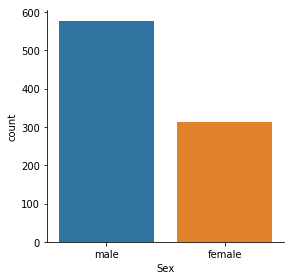

In [7]:
sns.factorplot("Sex",data=titanic_df,kind="count")

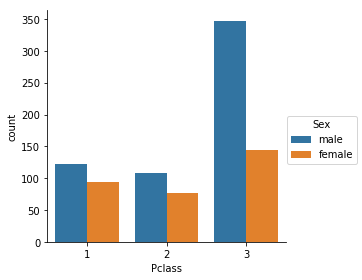

In [9]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind="count")

In [10]:
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


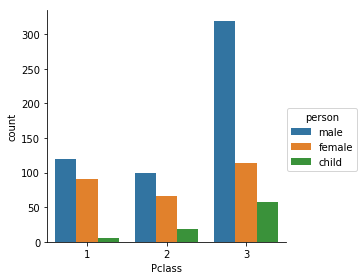

In [12]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind="count")

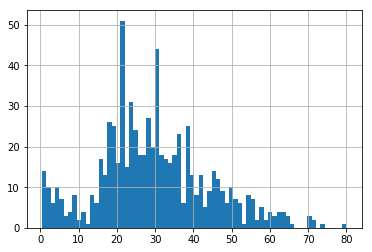

In [13]:
titanic_df['Age'].hist(bins=70)

In [14]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

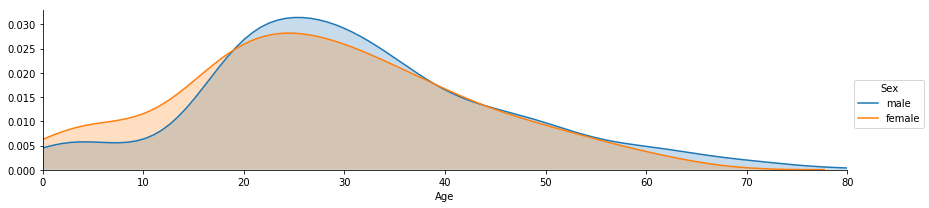

In [15]:
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

In [17]:
deck = titanic_df['Cabin'].dropna()

In [16]:
titanic_df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

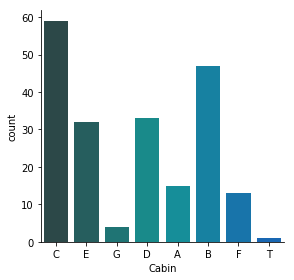

In [19]:
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind="count")

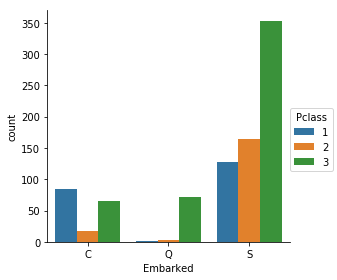

In [21]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind="count")

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [27]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'


/anaconda2/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


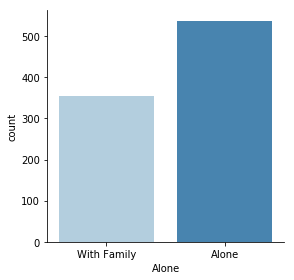

In [28]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind="count")

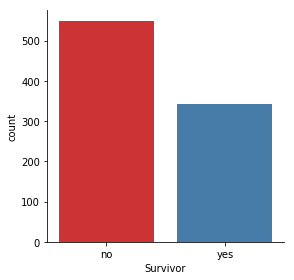

In [31]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind="count")


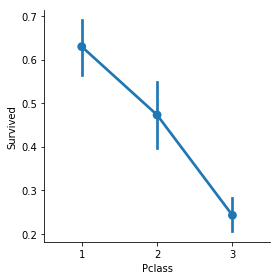

In [32]:
sns.factorplot('Pclass','Survived',data=titanic_df)

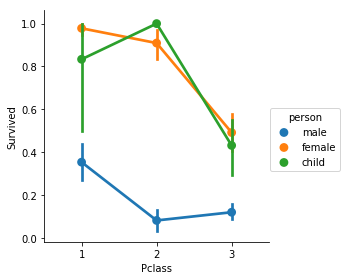

In [33]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

In [34]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')

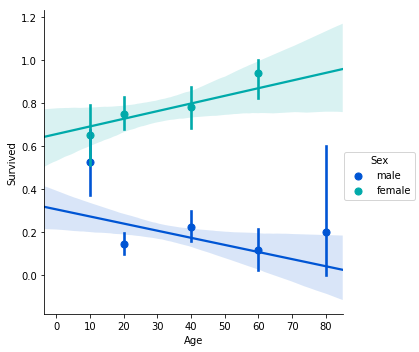

In [36]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [40]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [43]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

In [56]:
import pandas_datareader.data as web
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'quandl',start,end)

In [50]:
GOOG.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.0,180.0,180.000000,180.000000,180.000000,180.000000,1.800000e+02
mean,1019.003000,1027.203181,1010.522080,1019.202056,1.494941e+06,0.0,1.0,1019.003000,1027.203181,1010.522080,1019.202056,1.494941e+06
std,77.834322,79.492453,76.042501,77.683639,6.945437e+05,0.0,0.0,77.834322,79.492453,76.042501,77.683639,6.945437e+05
min,905.100000,913.000000,903.400000,906.660000,5.369580e+05,0.0,1.0,905.100000,913.000000,903.400000,906.660000,5.369580e+05
25%,941.302500,949.000000,933.792500,943.255000,1.111504e+06,0.0,1.0,941.302500,949.000000,933.792500,943.255000,1.111504e+06
50%,1021.095000,1030.215000,1013.580000,1021.160000,1.266257e+06,0.0,1.0,1021.095000,1030.215000,1013.580000,1021.160000,1.266257e+06
75%,1079.687500,1087.587500,1063.295000,1079.340000,1.665002e+06,0.0,1.0,1079.687500,1087.587500,1063.295000,1079.340000,1.665002e+06
max,1177.330000,1186.890000,1171.980000,1175.840000,5.125791e+06,0.0,1.0,1177.330000,1186.890000,1171.980000,1175.840000,5.125791e+06


In [55]:
MSFT.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.0,180.000000,180.000000,180.000000,180.000000,1.800000e+02
mean,82.268556,82.912426,81.598659,82.270167,2.403610e+07,0.004500,1.0,82.023324,82.665654,81.354837,82.024647,2.403610e+07
std,7.945135,8.132174,7.679517,7.857198,1.048953e+07,0.042601,0.0,8.173534,8.362124,7.906906,8.085892,1.048953e+07
min,69.460000,70.250000,69.200000,69.980000,7.425503e+06,0.000000,1.0,68.744042,69.525899,68.486722,69.258682,7.425503e+06
25%,74.022500,74.492500,73.692500,74.205000,1.732853e+07,0.000000,1.0,73.606477,74.117358,73.259201,73.629826,1.732853e+07
50%,83.505000,83.960000,82.960000,83.300000,2.153663e+07,0.000000,1.0,83.268540,83.765000,82.696435,83.300000,2.153663e+07
75%,88.967500,90.325000,87.949725,89.215000,2.647584e+07,0.000000,1.0,88.967500,90.325000,87.949725,89.215000,2.647584e+07
max,97.000000,97.240000,96.040000,96.770000,7.087735e+07,0.420000,1.0,97.000000,97.240000,96.040000,96.770000,7.087735e+07


In [57]:
AAPL.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000,179.0,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,165.180866,166.467429,163.845788,165.176245,2.984096e+07,0.003520,1.0,165.105761,166.391736,163.771206,165.101025,2.984096e+07
std,9.399431,9.444706,9.375981,9.345169,1.222036e+07,0.047088,0.0,9.512048,9.558465,9.485912,9.456819,1.222036e+07
min,144.110000,145.850000,143.370000,145.060000,1.402652e+07,0.000000,1.0,143.527644,145.260613,142.790634,144.473805,1.402652e+07
25%,157.365000,158.416400,155.980000,157.120000,2.128021e+07,0.000000,1.0,157.365000,158.416400,155.855000,157.045000,2.128021e+07
50%,166.870000,168.441700,164.940000,166.970000,2.641244e+07,0.000000,1.0,166.870000,168.441700,164.940000,166.970000,2.641244e+07
75%,173.470000,174.910000,172.040000,173.505000,3.547283e+07,0.000000,1.0,173.470000,174.910000,172.040000,173.505000,3.547283e+07
max,182.590000,183.500000,180.210000,181.720000,8.543608e+07,0.630000,1.0,182.590000,183.500000,180.210000,181.720000,8.543608e+07


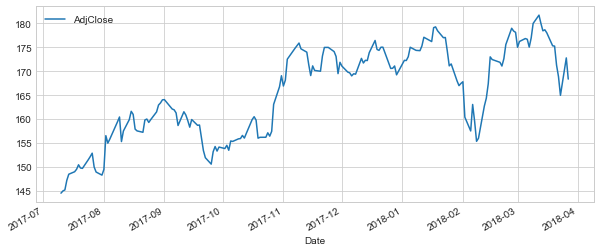

In [59]:
AAPL['AdjClose'].plot(legend=True,figsize=(10,4))

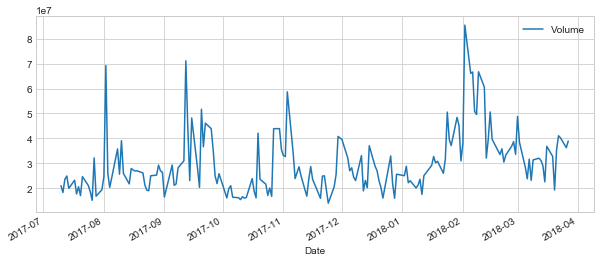

In [60]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

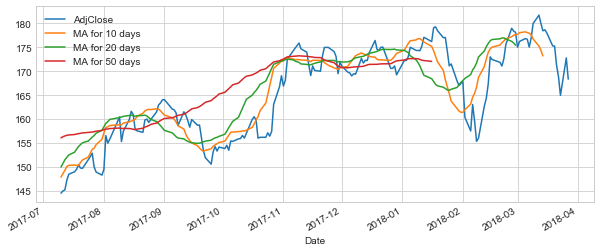

In [63]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['AdjClose'].rolling(ma).mean()
AAPL[['AdjClose','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

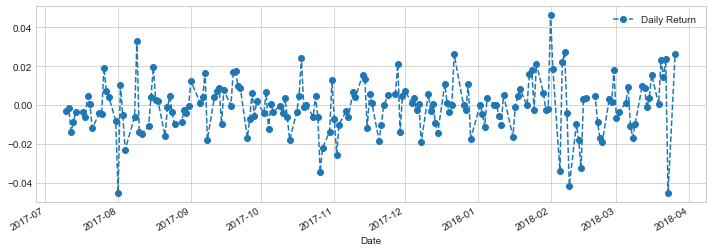

In [64]:
AAPL['Daily Return'] = AAPL['AdjClose'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


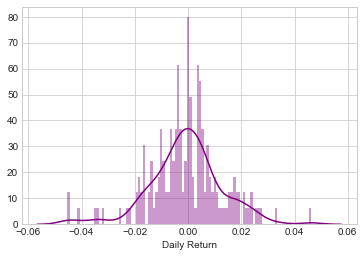

In [65]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [ ]:
closing_df.head()

/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


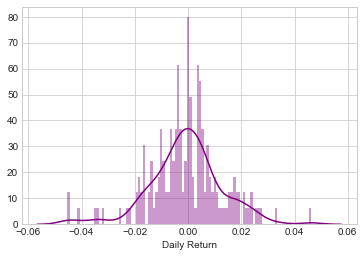

In [69]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [71]:
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [72]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [73]:
poll_df = pd.read_csv(poll_data)

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [74]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


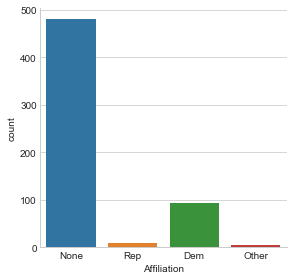

In [76]:
sns.factorplot('Affiliation',data=poll_df,kind="count")

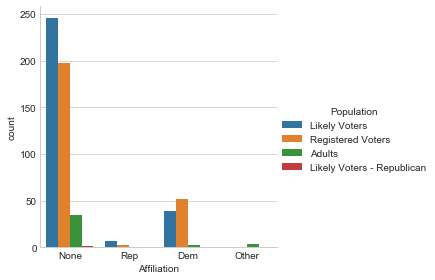

In [78]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind="count")

In [82]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


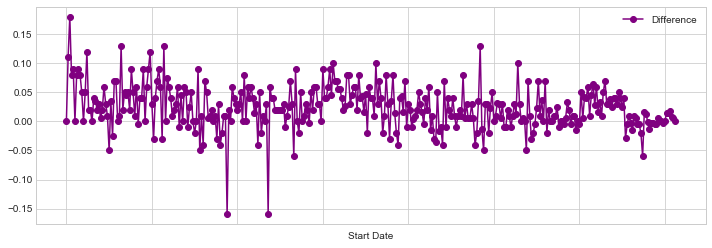

In [81]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')
